In [ ]:
!pip install requirements.txt

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.curdir)))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from utils.data import *
from data.preprocessing.preprocessing import *
import warnings
warnings.filterwarnings("ignore")

<font size="6">Loading data..</font>

In [2]:
train_data = load_data(os.path.join(dataset_path, 'train.csv'))
test_data = load_data(os.path.join(dataset_path, 'test.csv'))

<font size="6">Data Preprocessing..</font>

<font size="3">1. If modification is available, The sign + or - for Acetyl or Oxidation respectively, is added to the sequence after the indexed letter.</font><br>
<font size="3">For example: in the sequence: GTLSAELTAAHFGGGGGLLHK with modification: 4|Oxidation|10|Oxidation,</font><br>
<font size="3">the result sequence is GTLS+AELTAA+HFGGGGGLLHK</font><br>
<font size="3">2. The "PeptideSequence" title is changed to "text", the "RetentionTime" title is changed to "label",</font><br> 
<font size="3">and "ID" and "Modifications" columns are removed.</font>

In [3]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

<font size="6">Removing outliers from the train set</font>

In [4]:
numerical_cols = ['label']
for col in numerical_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_data[f'{col}_is_outlier'] = (train_data[col] < lower_bound) | (train_data[col] > upper_bound)
    
    # 5. Count outliers
    num_outliers = train_data[f'{col}_is_outlier'].sum()
    
    print(f"{col} Outliers detected: {num_outliers}")

label Outliers detected: 2


In [5]:
train_data = train_data[~train_data[f'{col}_is_outlier']]
print(len(train_data))
train_data = train_data.drop(f'{col}_is_outlier', axis=1)

9998


<font size="6">Preprocessed Data Visualization</font>

In [6]:
text_col = 'text'
train_data[f"{text_col}_length"] = train_data[text_col].str.len()
test_data[f"{text_col}_length"] = test_data[text_col].str.len()
numerical_col = f"{text_col}_length"

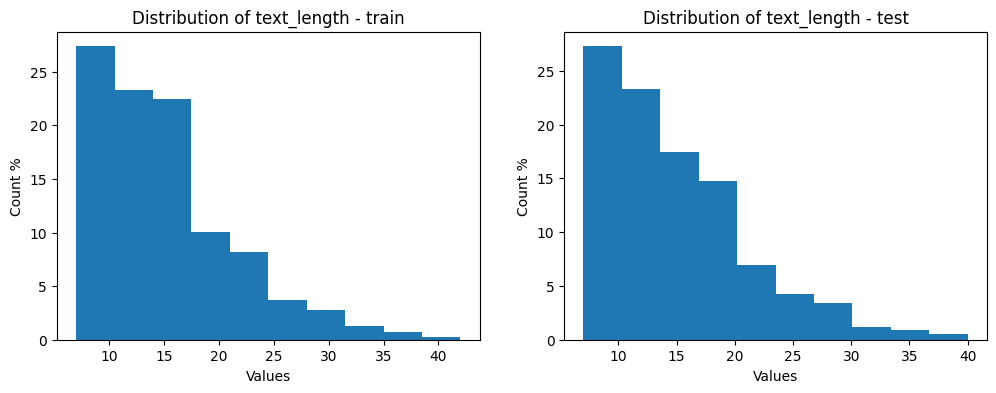

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
datasets = {'train':train_data, 'test': test_data}
# fig.tight_layout()
for ax, data_type in zip(axes, datasets):
    ax.hist(datasets[data_type][numerical_col], weights=100*np.ones(len(datasets[data_type][numerical_col])) / len(datasets[data_type][numerical_col]))
    ax.set_title(f'Distribution of {numerical_col} - {data_type}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Count %')

In [8]:
train_data = train_data.drop(f"{text_col}_length", axis=1)
test_data = test_data.drop(f"{text_col}_length", axis=1)

<font size="6">Saving preprocessed data</font>

In [9]:
save_data(train_data, os.path.join(dataset_path, 'preprocessed', 'train.csv'), file_type='csv')
save_data(train_data, os.path.join(dataset_path, 'preprocessed', 'test.csv'), file_type='csv')